In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import re
import cv2

from PIL import Image, ImageOps

This script is intended to transform original .npy files

In [3]:
root = '/projects/wg-psel-ml/EL_images/osanghi/CornersIHDEANE/'

busbars_load_path = load_path = root + 'ann_npy_split_busbars/original/'
cracks_load_path = load_path = root + 'ann_npy_split_cracks/original/'

In [7]:
for mask_name in [c for c in os.listdir(load_path) if 'ipynb' not in c]:

    # load_path/ + '1207 - asdasd.jpg.npy' or 'xyz.npy'
    mask_path = load_path + mask_name

    if os.path.isdir(mask_path):
        continue
        # i += 1
        # img_path = path + os.listdir(path)[i]
    
    loaded_mask = np.load(mask_path, allow_pickle=True)

    # mask_name
    np.save(root + 'all/' + mask_name, loaded_mask)

    # mirror_y
    mirror_y = np.flip(loaded_mask, 1)
    np.save(root + 'all/my_' + mask_name, mirror_y)
    np.save(root + '/mirrored_y/my_' + mask_name, mirror_y)

    # mirror_x
    mirror_x = np.flip(loaded_mask, 0)
    np.save(root + 'all/mx_' + mask_name, mirror_x)
    np.save(root + '/mirrored_x/mx_' + mask_name, mirror_x)

    # mirror_xy
    mirror_xy = np.flip(mirror_x, 1)
    np.save(root + 'all/mxy_' + mask_name, mirror_xy)
    np.save(root + '/mirrored_xy/mxy_' + mask_name, mirror_xy)

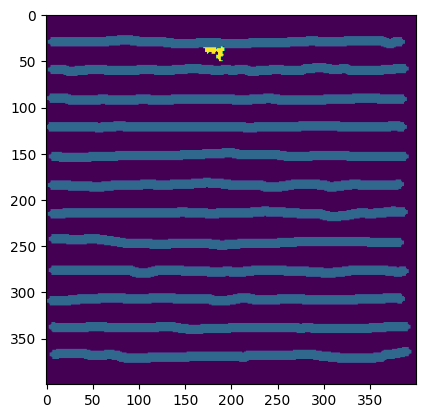

In [5]:
plt.imshow(mirror_y)

In [69]:
root = '/projects/wg-psel-ml/EL_images/eccoope/img_cropped/'
load_path = root + 'original/'

In [70]:
for i in [c for c in os.listdir(load_path) if 'ipynb' not in c]:

    img_path = load_path + i

    if os.path.isdir(img_path):
        continue
        # i += 1
        # img_path = path + os.listdir(path)[i]

    img_name = os.path.split(img_path)[-1]

    my_img = cv2.imread(img_path)

    cv2.imwrite(root + 'all/' + img_name, my_img)

    # img_name

    mirror_y = np.flip(my_img, 1)

    # mirror_y
    cv2.imwrite(root + 'all/my_' + img_name, mirror_y)
    cv2.imwrite(root + '/mirrored_y/my_' + img_name, mirror_y)

    mirror_x = np.flip(my_img, 0)

    # mirror_x
    cv2.imwrite(root + 'all/mx_' + img_name, mirror_x)
    cv2.imwrite(root + '/mirrored_x/mx_' + img_name, mirror_x)

    mirror_xy = np.flip(mirror_x, 1)
    # mirror_xy
    
    cv2.imwrite(root + 'all/mxy_' + img_name, mirror_xy)
    cv2.imwrite(root + '/mirrored_xy/mxy_' + img_name, mirror_xy)

In [65]:
img_path

'/projects/wg-psel-ml/EL_images/eccoope/split_busbars/asu3_cropped/original/1_EL_2x2_NQ-04_20230915_130134.jpg'

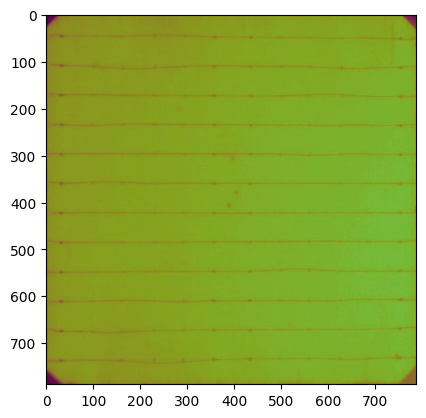

In [63]:
plt.imshow(mirror_x)